In [1]:
import allel
import gzip
import glob
import random
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
file_names = glob.glob("data/sars-cov2.variants/*.gz")

In [3]:
len(file_names)

83230

In [14]:
random.shuffle(file_names)
samples = dict()
max_file = 1
for idx in range(max_file):
    file_path = file_names[idx]
    file_name = file_path.split('/')[-1]
    df = allel.vcf_to_dataframe(file_path)
    df = df[df["FILTER_PASS"] == True]
    #df = df[df["FILTER_PASS"] == True]
    print(len(df))
    print(df)
    samples[file_name] = list()
    try:
        for idx, i in enumerate(df["POS"].tolist()):
            variant = dict()
            variant[i] = "{}>{}".format(df["REF"][idx], df["ALT_1"][idx]) #(df["REF"][idx], df["ALT_1"][idx])
            samples[file_name].append(variant)
    except Exception as ex:
        continue

46
           CHROM    POS ID   REF ALT_1  ALT_2  ALT_3     QUAL  FILTER_PASS
0    NC_045512.2    110  .    CT     C    NaN    NaN   6312.0         True
4    NC_045512.2    515  .     G     T    NaN    NaN  15103.0         True
5    NC_045512.2    517  .     T     C    NaN    NaN  15049.0         True
7    NC_045512.2    558  .     G     T    NaN    NaN  14363.0         True
9    NC_045512.2    892  .     T    TA    NaN    NaN  49314.0         True
15   NC_045512.2   2910  .     C     T    NaN    NaN  29478.0         True
16   NC_045512.2   3037  .     C     T    NaN    NaN  49314.0         True
20   NC_045512.2   4798  .    TA     T    NaN    NaN   4292.0         True
23   NC_045512.2   5621  .     C     T    NaN    NaN  29674.0         True
24   NC_045512.2   6595  .     T    TA    NaN    NaN  12868.0         True
25   NC_045512.2   6696  .     C     T    NaN    NaN  16020.0         True
27   NC_045512.2   8008  .     T     G    NaN    NaN   5768.0         True
29   NC_045512.2   906

In [8]:
s_names = list()
variants_freq = dict()

for sample in samples:
    positions = list()
    variants = list()
    print(sample)
    lst = samples[sample]
    print(lst)
    for item in lst:
        pos = list(item.keys())[0]
        var = list(item.values())[0]
        if var not in variants_freq:
            variants_freq[var] = 1
        else:
            variants_freq[var] += 1
        #positions.append(pos)
        #variants.append(var)

[{204: 'G>T'}, {241: 'C>T'}, {445: 'T>C'}, {685: 'AAAGTCATTT>A'}, {694: 'T>A'}, {712: 'TG>T'}, {801: 'GA>G'}, {972: 'ATG>A'}, {1243: 'TG>T'}, {1274: 'G>T'}, {1720: 'TGC>T'}, {1813: 'TA>T'}, {2434: 'CAG>C'}, {2548: 'TGA>T'}, {2889: 'TG>T'}, {3037: 'C>T'}, {4134: 'TTG>T'}, {4169: 'CCTA>C'}, {4174: 'TA>T'}, {4206: 'C>T'}, {4438: 'CTG>C'}, {4589: 'A>G'}, {5507: 'T>A'}, {5595: 'AAC>A'}, {5893: 'CAT>C'}, {6039: 'TC>T'}, {6044: 'AATT>A'}, {6181: 'TA>T'}, {6286: 'C>T'}, {6309: 'GCA>G'}, {6317: 'C>T'}, {6646: 'AGCT>A'}, {7057: 'TG>T'}, {7149: 'TAG>T'}, {7187: 'CAA>C'}, {7246: 'GT>G'}, {7572: 'TC>T'}, {7627: 'TTG>T'}, {8345: 'TG>T'}, {8370: 'AG>A'}, {8458: 'TGC>T'}, {9110: 'CG>C'}, {9110: 'C>T'}, {9320: 'TG>T'}, {9321: 'G>T'}, {10201: 'G>T'}, {10313: 'CT>C'}, {10372: 'TC>T'}, {10849: 'TG>T'}, {10869: 'TG>T'}, {10873: 'AAATGGTATG>A'}, {11042: 'G>T'}, {11074: 'C>CT'}, {11074: 'CT>C'}, {11083: 'G>T'}, {11089: 'A>C'}, {11103: 'CT>C'}, {11236: 'TAG>T'}, {11245: 'G>T'}, {11824: 'CA>C'}, {12164: 'G>T'}

In [9]:
variants_freq

{'G>T': 22,
 'C>T': 49,
 'T>C': 9,
 'AAAGTCATTT>A': 2,
 'T>A': 3,
 'TG>T': 13,
 'GA>G': 2,
 'ATG>A': 3,
 'TGC>T': 2,
 'TA>T': 6,
 'CAG>C': 1,
 'TGA>T': 1,
 'TTG>T': 3,
 'CCTA>C': 1,
 'CTG>C': 1,
 'A>G': 6,
 'AAC>A': 3,
 'CAT>C': 2,
 'TC>T': 10,
 'AATT>A': 1,
 'GCA>G': 2,
 'AGCT>A': 1,
 'TAG>T': 3,
 'CAA>C': 3,
 'GT>G': 3,
 'AG>A': 7,
 'CG>C': 2,
 'CT>C': 8,
 'AAATGGTATG>A': 1,
 'C>CT': 3,
 'A>C': 5,
 'CA>C': 13,
 'AC>A': 5,
 'GC>G': 1,
 'AAG>A': 3,
 'GACT>G': 1,
 'TAC>T': 3,
 'ACAG>A': 1,
 'TTA>T': 1,
 'AAAG>A': 1,
 'G>C': 3,
 'AT>A': 2,
 'A>T': 3,
 'TTC>T': 3,
 'CTT>C': 2,
 'GCACA>G': 1,
 'C>G': 3,
 'CCAA>C': 2,
 'AGC>A': 1,
 'AAAC>A': 1,
 'GCCA>G': 1,
 'C>A': 4,
 'CTACAATTGTGTACTTTTACTAGAAG>C': 1,
 'T>G': 9,
 'TACGTGTATAAC>T': 1,
 'TTTTGGGTGTTTA>T': 1,
 'GGTGTTTATT>G': 1,
 'TCTTGTAGGCTTGATGTGGCTCAGCTACTTCATTG>T': 1,
 'GTAGGCTTGATGTGGCTCAGCTACTTCATTGCTTCTT>G': 1,
 'ATGGTCATGTTATGGT>A': 1,
 'GGTCATGTTA>G': 1,
 'GGTCATGTTATGGTT>G': 1,
 'GAAAATTTTAATCAGCACGAAGTTCTACTTGCACCATTA>G': 1,
 'T

In [10]:
count_variants = pd.DataFrame(variants_freq.items(), columns=['Variants', 'Count'])

In [11]:
count_variants

,Variants,Count
0,G>T,22
1,C>T,49
2,T>C,9
3,AAAGTCATTT>A,2
4,T>A,3
...,...,...
72,TTTAACGGCCTTACTG>T,1
73,G>A,1
74,CTTGTCTTGTAGGCTTGATGTGGCTCAGCTACTTCATTGCTTCTTT...,1
75,T>TCTG,1


In [12]:
count_variants = count_variants.sort_values(by=["Count"])

In [13]:
count_variants

,Variants,Count
38,TTA>T,1
37,ACAG>A,1
75,T>TCTG,1
39,AAAG>A,1
45,GCACA>G,1
...,...,...
18,TC>T,10
31,CA>C,13
5,TG>T,13
0,G>T,22


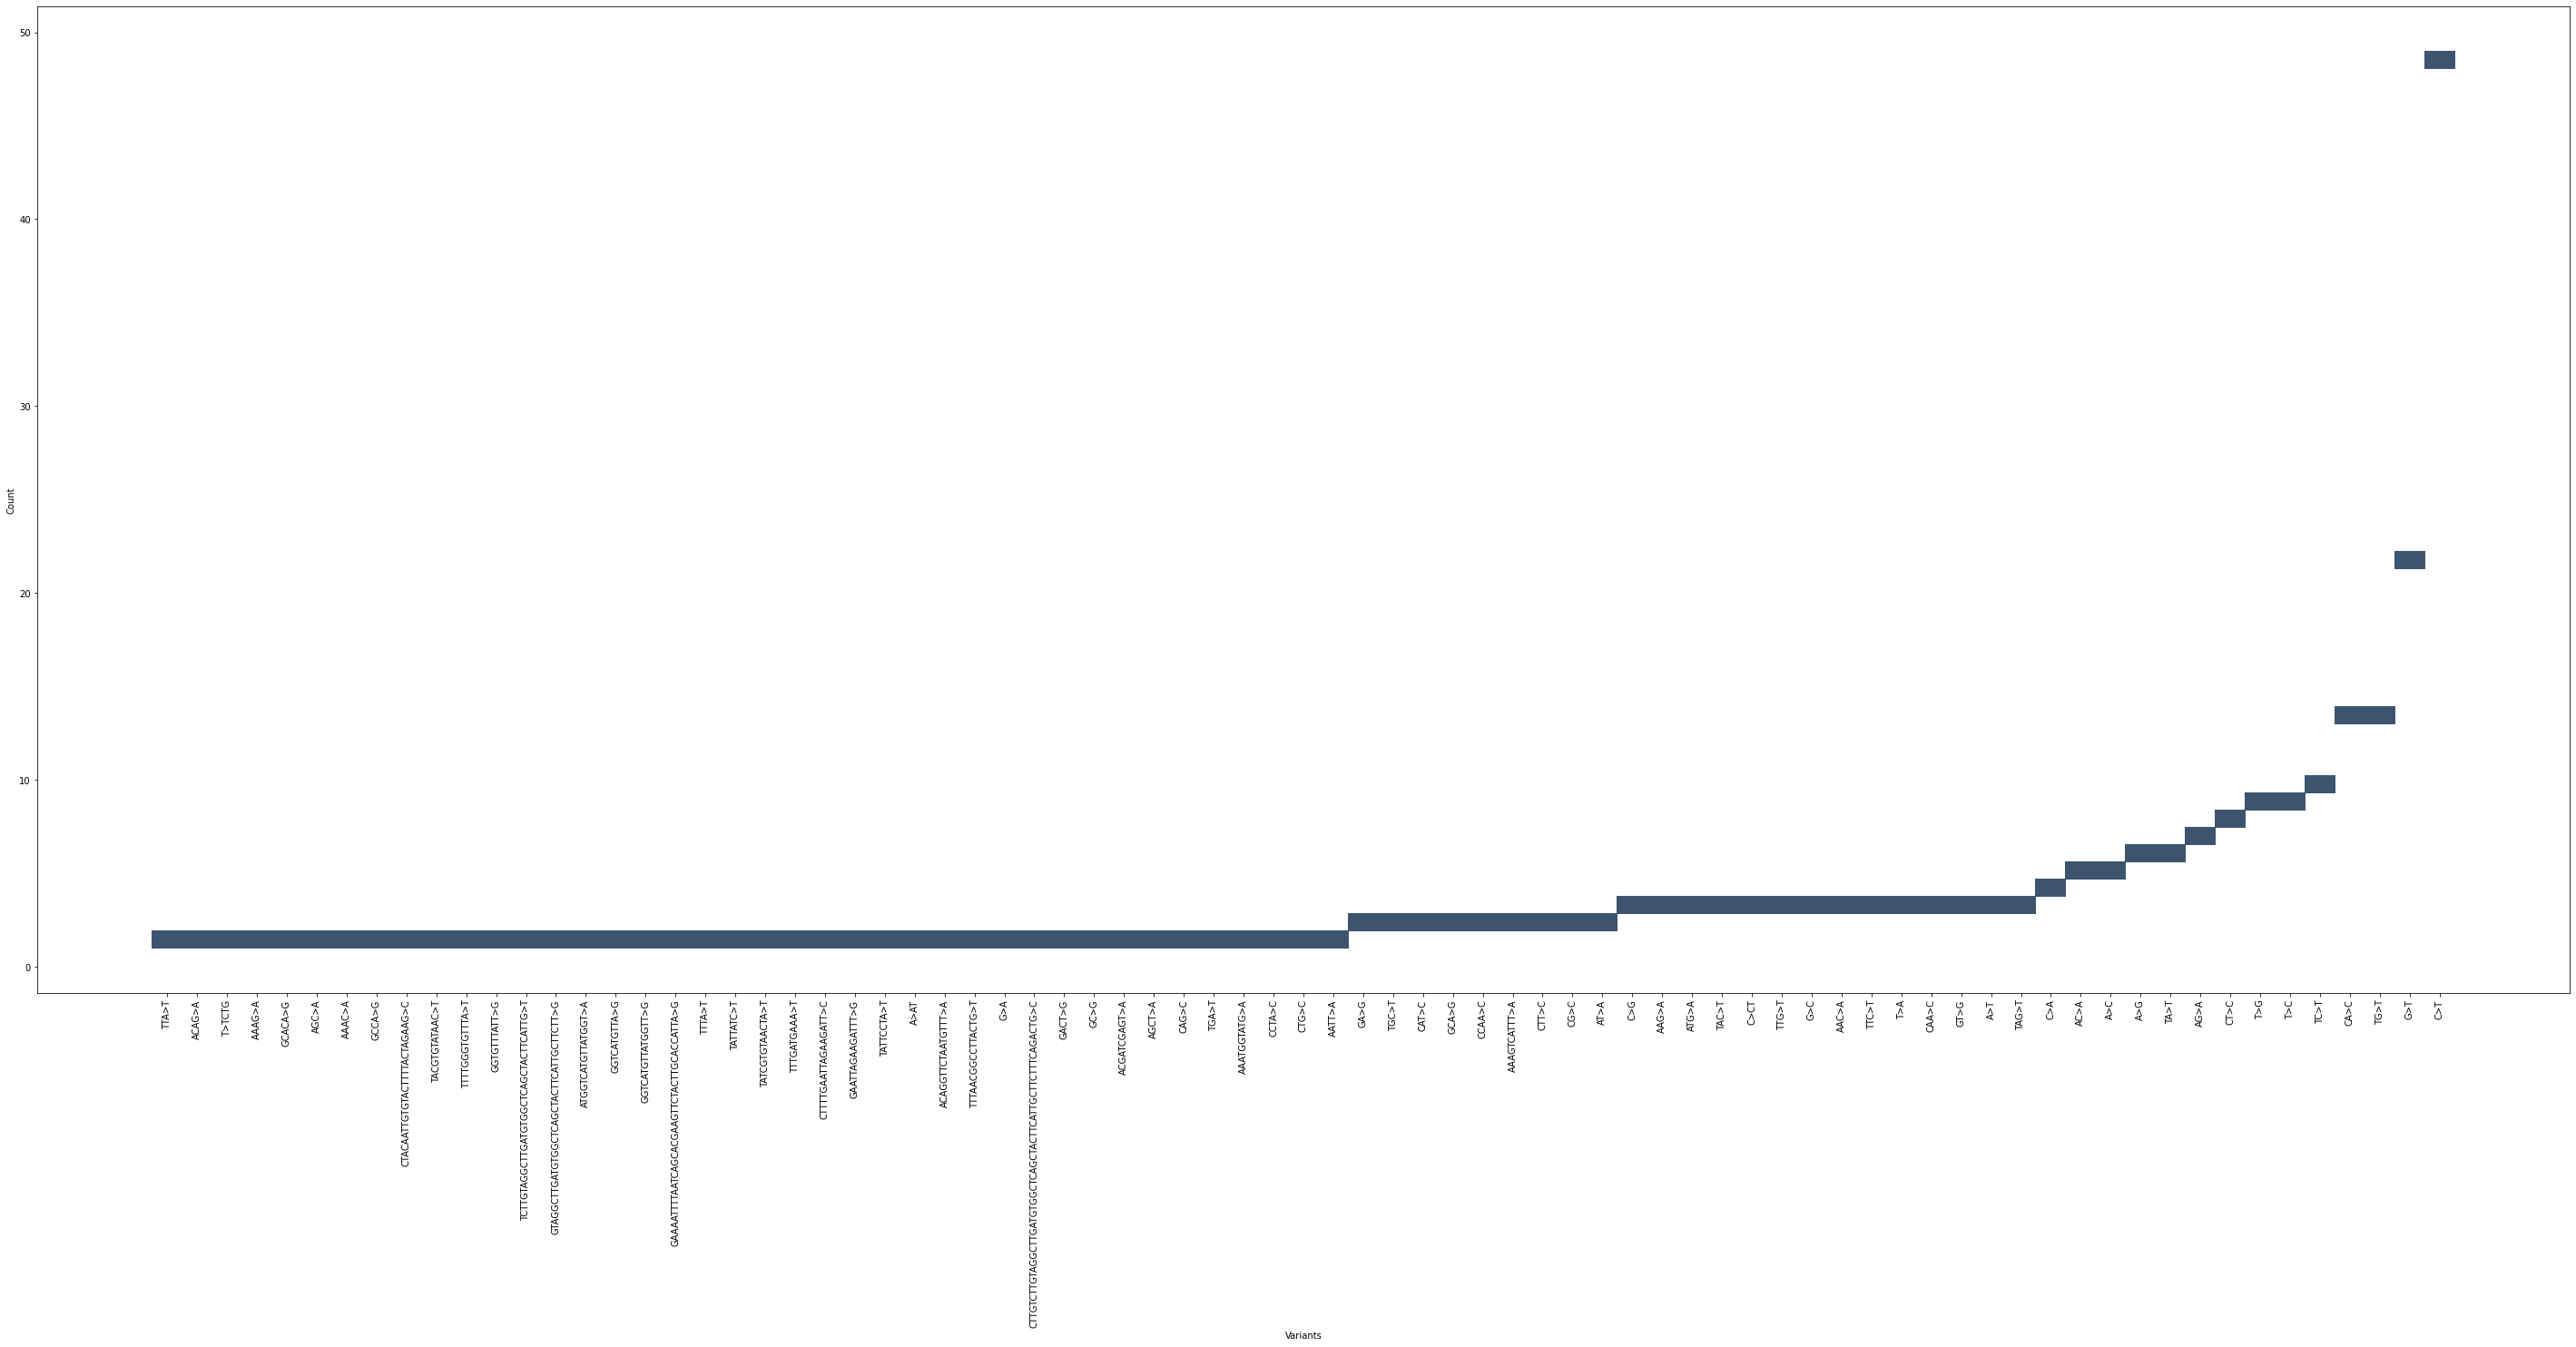

In [14]:
plt.figure(figsize=(50, 20))
g = sns.histplot(data=count_variants, x="Variants", y="Count")
plt.xticks(rotation=90)
plt.show()